<a href="https://colab.research.google.com/github/AyorindeTayo/ANN/blob/master/Copy_of_Copy_of_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am going to implement a simple linear regression model with tensorflow. We are going to predict the Hardness of a welded material in term of the welding power, speed, time.

In [0]:
# importing the tensorflow package and other auxilary packages
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras


##1. Loading the data with pandas

In [0]:
# Loading the data with the pandas read_csv attribute
from google.colab import files
files.upload()

Saving data_1004.xlsx to data_1004 (2).xlsx


{'data_1004.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xa7\x0c\xebyh\x01\x00\x00\r\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
df=pd.read_excel('data_1004.xlsx')
data = pd.DataFrame(df)

In [0]:
def boxplot(df,x,y):
  ax = sns.boxplot(x="x", y="x", data=df)

In [0]:
# Renaming the feature and looking at the data
data

,S-temp,S-time,Wel-power,Wel-speed,Hardness
0,1000,5,1500,3,343.7
1,1000,5,1500,3,350.1
2,1000,5,1500,3,351.7
3,1000,5,1500,3,365.6
4,1000,5,1500,3,337.5
5,1000,5,1500,3,362.8
6,1000,5,1500,3,356.7
7,1000,5,1500,3,357.0
8,1000,5,1500,3,356.9
9,1000,5,1500,3,361.2


In [0]:
# The shape of our data.
data.shape

(30, 5)

In [0]:
# looking at the type of the data
data.dtypes

S-temp         int64
S-time         int64
Wel-power      int64
Wel-speed      int64
Hardness     float64
dtype: object

##1. Box plotting

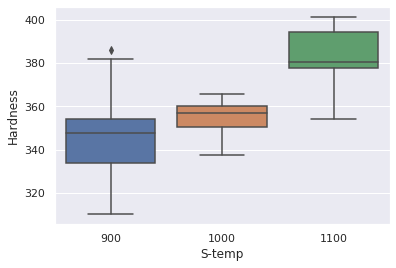

In [0]:
 ax = sns.boxplot(x="S-temp", y="Hardness", data=df)

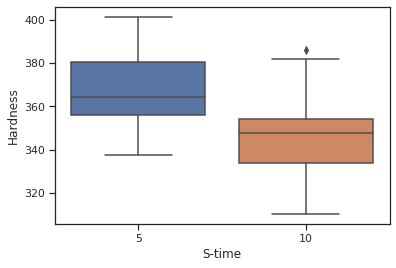

In [0]:
ax = sns.boxplot(x="S-time", y="Hardness", data=df)

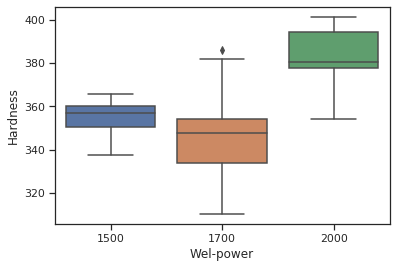

In [0]:
ax = sns.boxplot(x="Wel-power", y="Hardness", data=df)

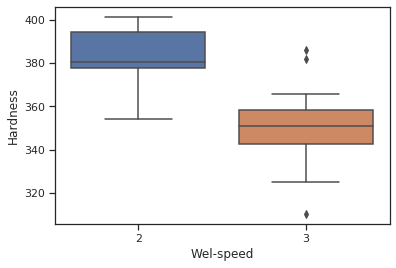

In [0]:
ax = sns.boxplot(x="Wel-speed", y="Hardness", data=df)


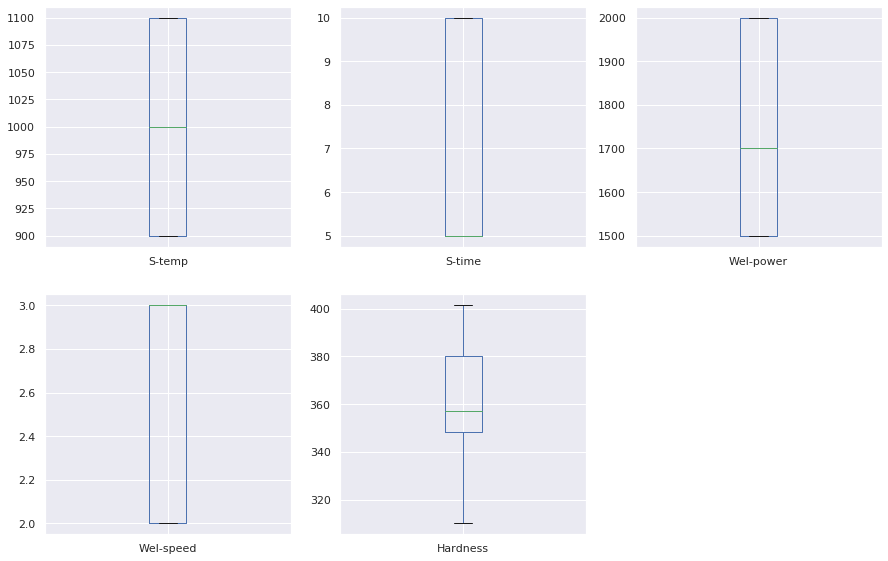

In [0]:
df.plot(kind='box',figsize=(15,15), subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

One could do more plotting but we are ok now to build up our model. But first of all let us write a function that will help normalize our data.

##3. Definig the function to normalize the data
Normalization is very important in machine learning as building a model on a raw data set may result in poor performance of the model. It is always advisable to do so before feeding the data into your machine learning algorithm. 

In [0]:
#This function will return the normalized data  
def Normalize(x):
    return (x-np.mean(x))/np.std(x)

##4- Splitting the data in test and train set

In [0]:
#I steal this from tensorflow tutorial. One could also used the split function in sklearn.
train_set=data.sample(frac=0.75,random_state=0)
test_set=data.drop(train_set.index)

## 5. Data visualisation and statistics

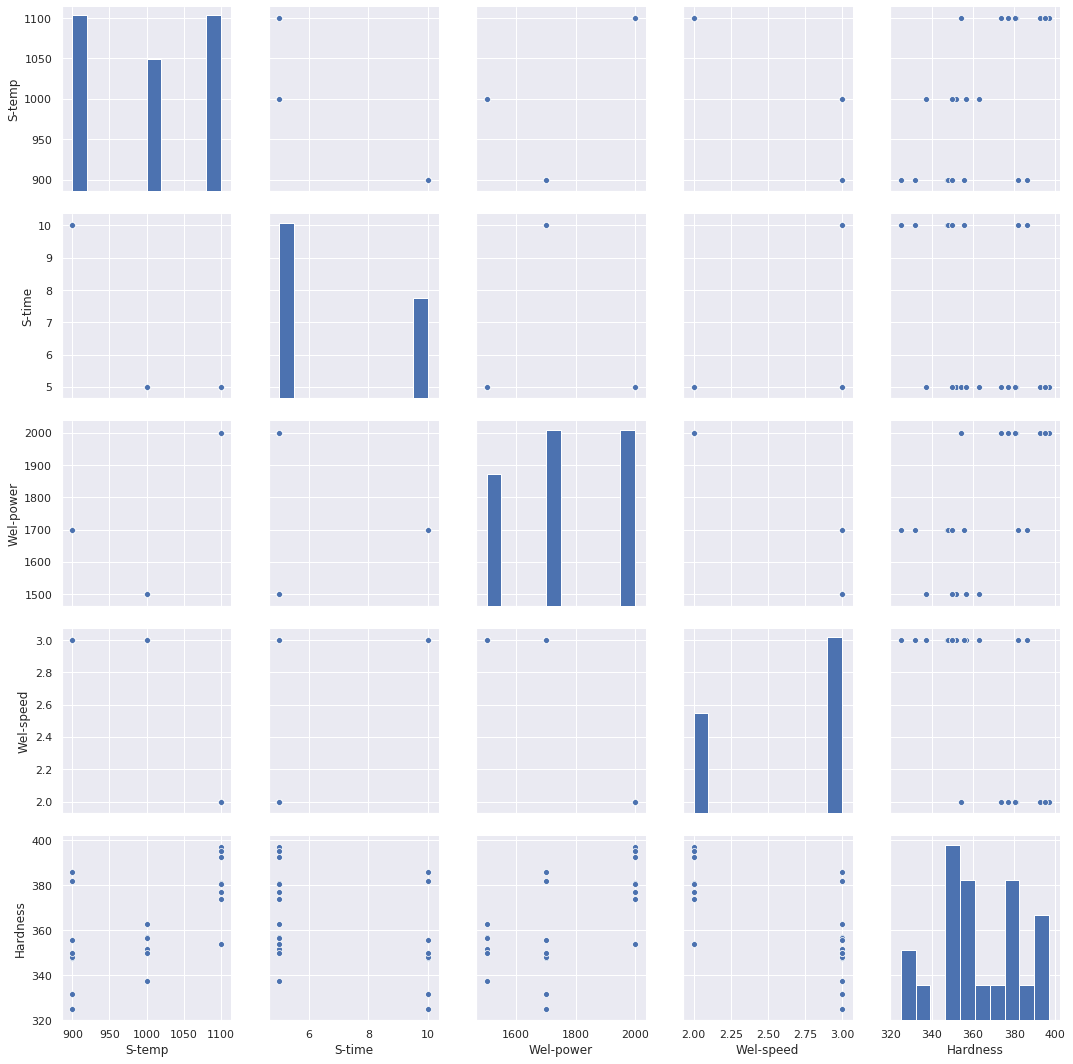

In [0]:
sns.set()
sns.pairplot(train_set, height=3);

In [0]:
train_set.describe()

,S-temp,S-time,Wel-power,Wel-speed,Hardness
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1000.000000,6.818182,1754.545455,2.636364,363.290909
std,87.287156,2.461830,206.391382,0.492366,20.812082
min,900.000000,5.000000,1500.000000,2.000000,325.000000
25%,900.000000,5.000000,1550.000000,2.000000,349.950000
50%,1000.000000,5.000000,1700.000000,3.000000,356.800000
75%,1100.000000,10.000000,2000.000000,3.000000,380.775000
max,1100.000000,10.000000,2000.000000,3.000000,396.900000


## 6. Defining the labels

In [0]:
train_labels=train_set.pop('Hardness')
test_labels=test_set.pop('Hardness')

##3. Defining and compiling the model
Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [0]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_set.keys())]),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','mse'] )
    return model


In [0]:
model=build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


## Training the model
Here we are going to train our model by feeding into the model the training sets of data (features and labels).

In [0]:
history = model.fit(
  train_set, train_labels,
  epochs=150, validation_split = 0.2, verbose=0)

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
145,1468.213623,33.774914,1468.213623,418.109558,16.589252,418.109558,145
146,1345.149048,29.904770,1345.149048,2154.992920,43.047417,2154.992920,146
147,1227.201660,30.278702,1227.201660,391.470978,15.796850,391.470978,147
148,1223.390625,28.294092,1223.390625,2111.484131,42.431206,2111.484131,148
149,1195.979492,29.862705,1195.979492,423.827454,16.827423,423.827454,149


## Plotting the results

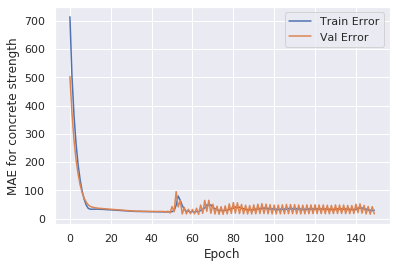

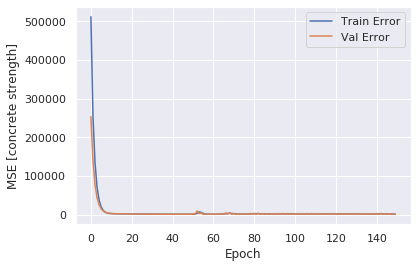

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE for concrete strength')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE [concrete strength]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


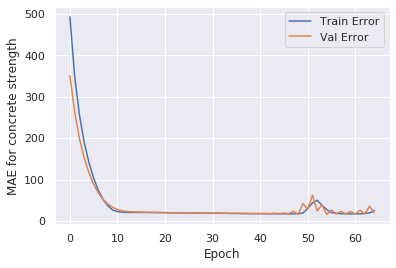

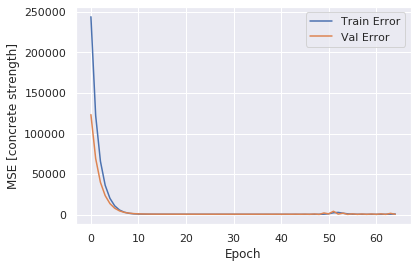

In [0]:
model=build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_set, train_labels, epochs=150,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)


In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
60,500.702393,17.471651,500.702393,453.837830,17.250666,453.837830,60
61,521.546875,17.531935,521.546875,1101.630127,26.295465,1101.630127,61
62,565.038086,18.522263,565.038086,418.910156,16.928015,418.910156,62
63,676.133972,19.872950,676.133972,1692.635986,35.924927,1692.635986,63
64,899.714661,24.947155,899.714661,534.092468,20.196650,534.092468,64


In [0]:
loss, mae, mse = model.evaluate(test_set, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Hardness".format(mae))


Testing set Mean Abs Error: 22.43 Hardness


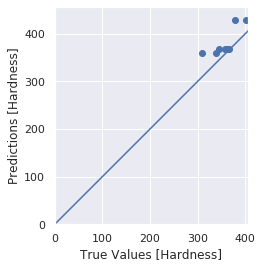

In [0]:
test_predictions = model.predict(test_set).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Hardness]')
plt.ylabel('Predictions [Hardness]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])


In [0]:
test_predictions

array([368.17758, 368.17758, 368.17758, 368.17758, 359.10947, 359.10947,
       427.82812, 427.82812], dtype=float32)

In [0]:
test_labels

0     343.7
3     365.6
7     357.0
9     361.2
12    310.0
15    339.3
21    379.0
25    401.4
Name: Hardness, dtype: float64

In [0]:
Normalize(train_set)

,S-temp,S-time,Wel-power,Wel-speed
2,0.000000,-0.755929,-1.262337,0.755929
28,1.172604,-0.755929,1.217254,-1.322876
13,-1.172604,1.322876,-0.270501,0.755929
10,-1.172604,1.322876,-0.270501,0.755929
26,1.172604,-0.755929,1.217254,-1.322876
24,1.172604,-0.755929,1.217254,-1.322876
27,1.172604,-0.755929,1.217254,-1.322876
11,-1.172604,1.322876,-0.270501,0.755929
17,-1.172604,1.322876,-0.270501,0.755929
22,1.172604,-0.755929,1.217254,-1.322876


In [0]:
Normalize(train_labels)

2    -0.570038
28    0.684045
13   -1.548714
10   -0.771675
26    1.652886
24    0.866010
27    1.446331
11   -1.883137
17   -0.756921
22    0.841421
5    -0.024143
16    1.121745
8    -0.314303
14   -0.658561
23    0.511916
20   -0.456924
1    -0.648725
29    1.564363
6    -0.324139
4    -1.268390
18    0.910272
19   -0.373319
Name: Hardness, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


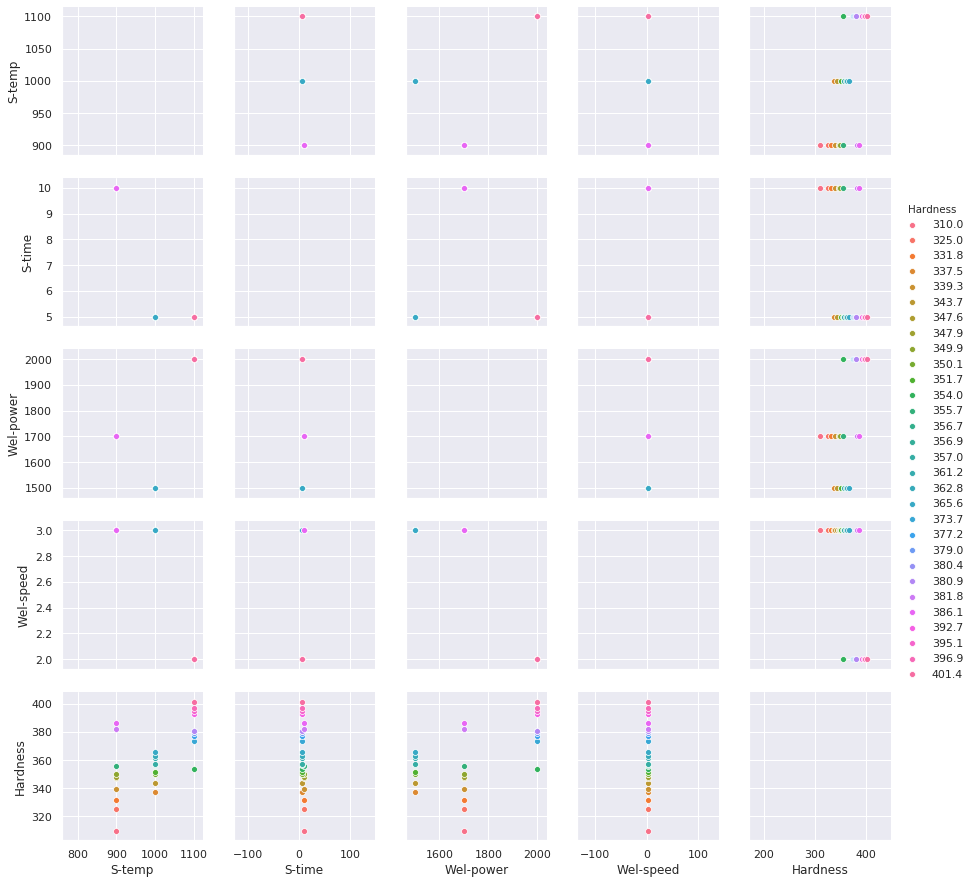

In [0]:
sns.pairplot(data, hue="Hardness", palette="husl")

Plotting *italicized text*


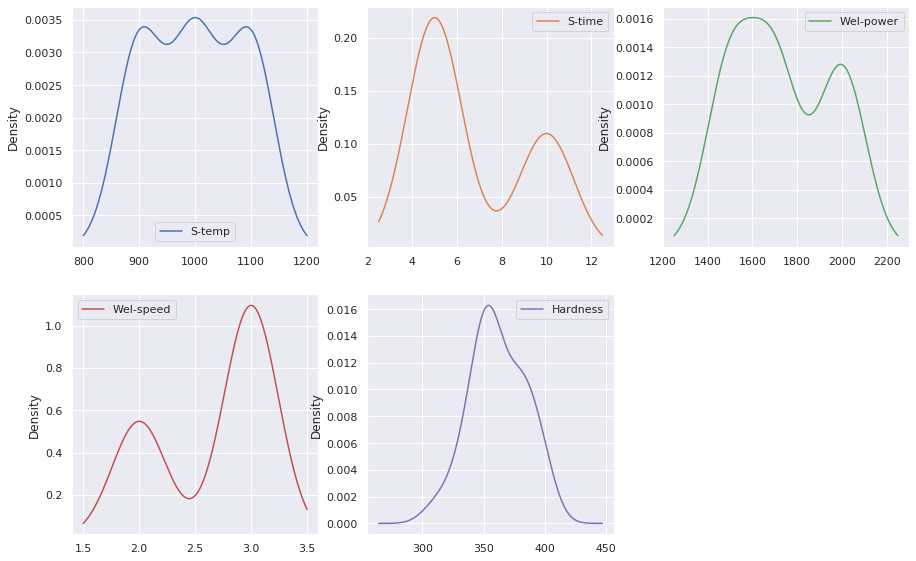

In [0]:
df.plot(kind='density',figsize=(15,15), subplots=True, layout=(3,3), sharex=False)
plt.show()

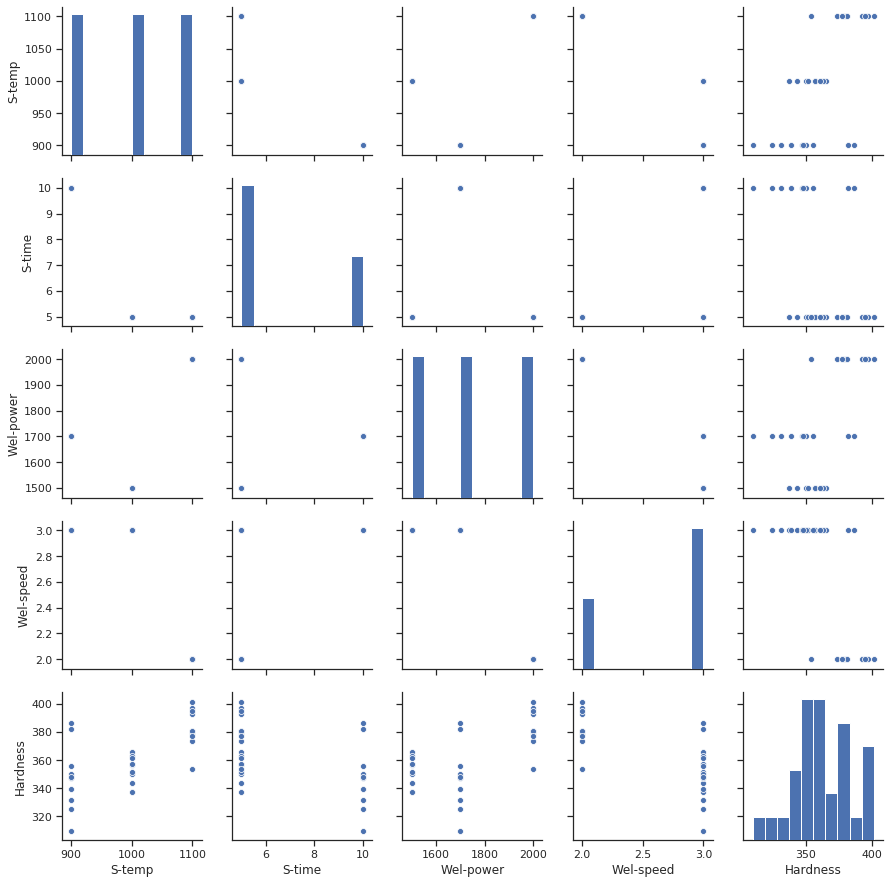

In [0]:
 import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


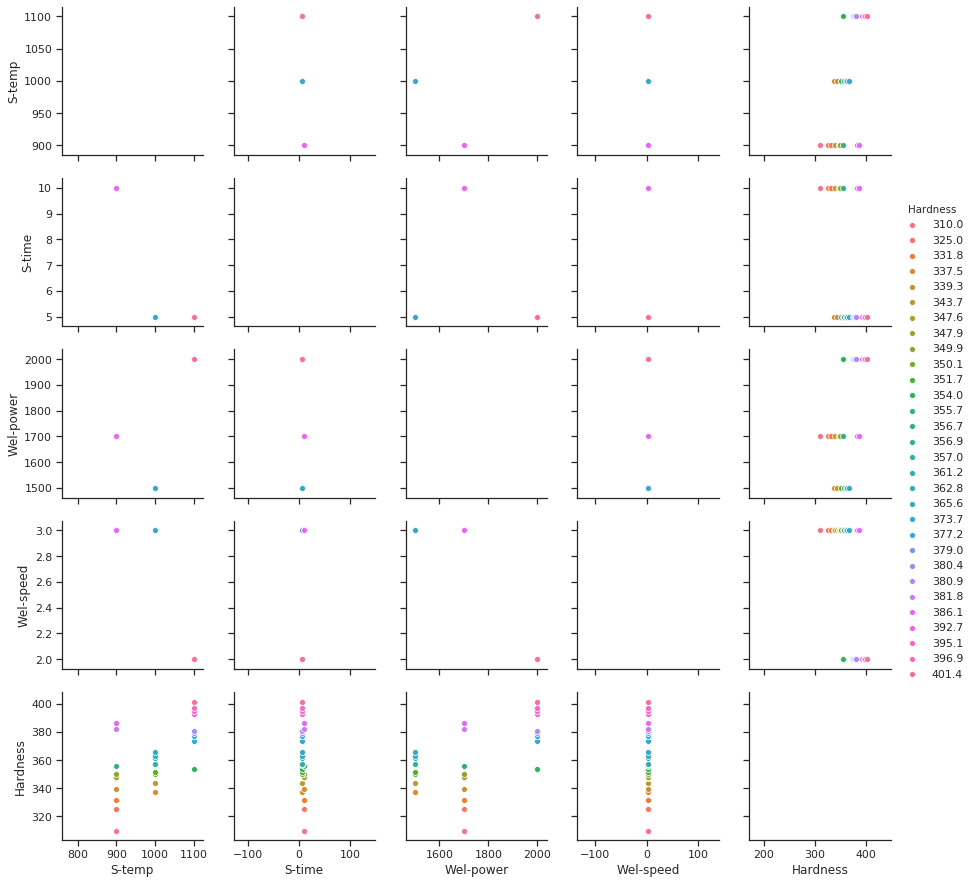

In [0]:
sns.pairplot(data, hue="Hardness")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


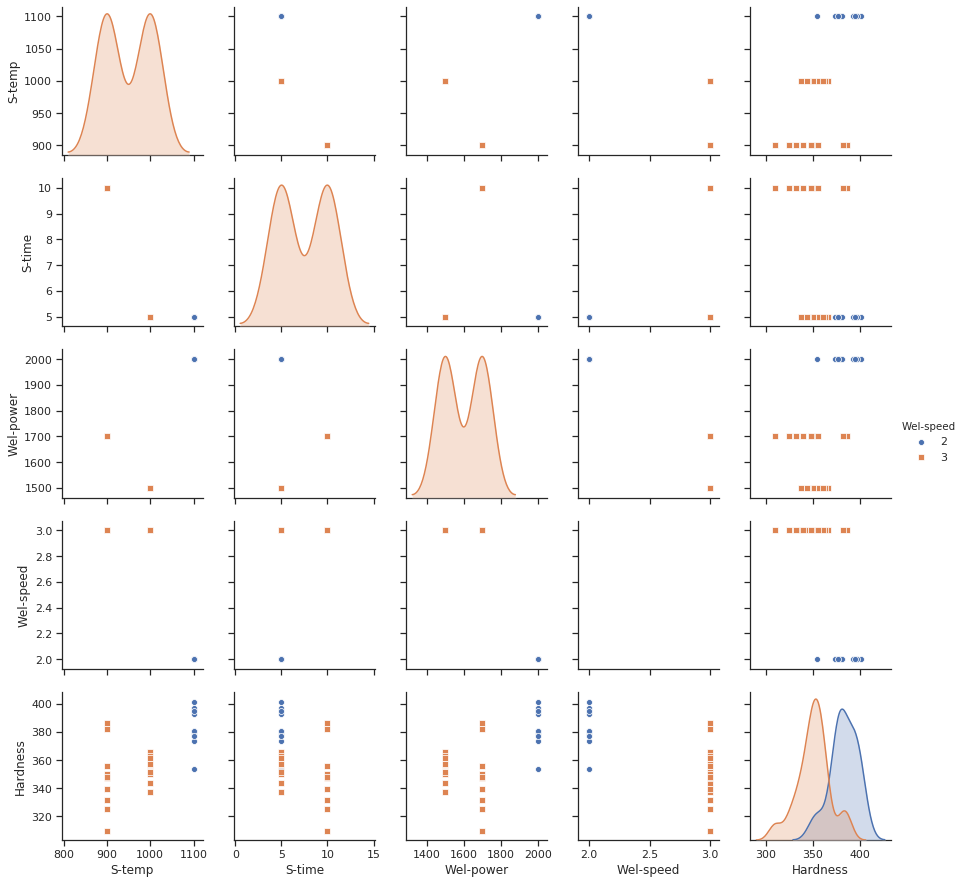

In [0]:
sns.pairplot(data, hue="Wel-speed", markers=["o", "s"])

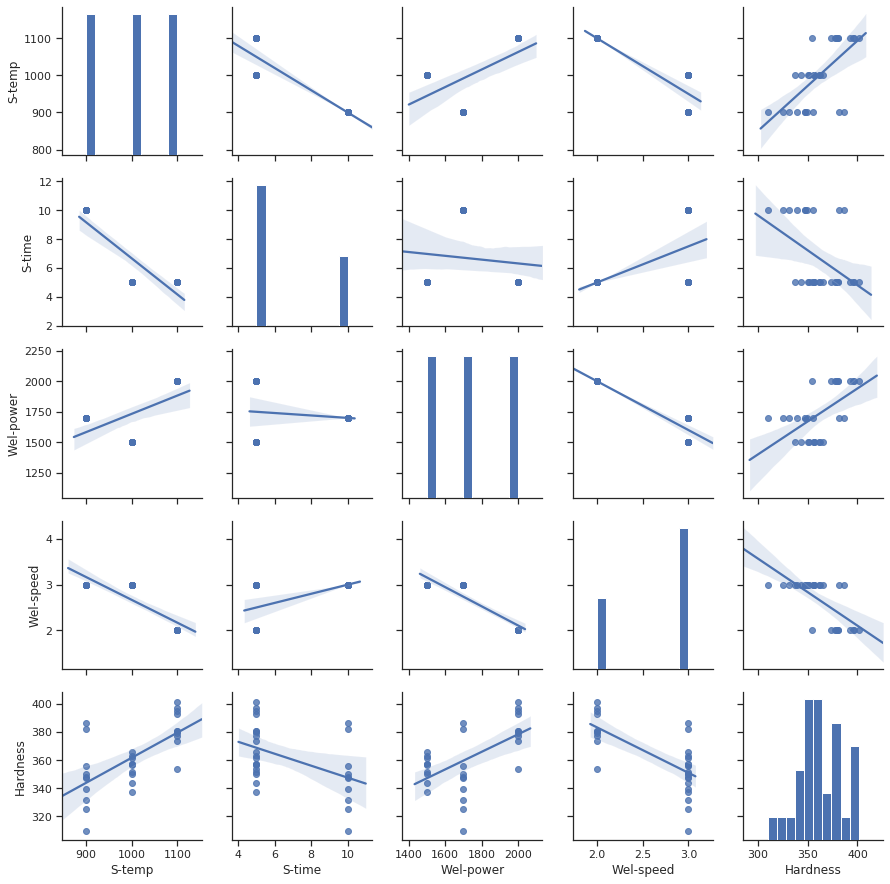

In [0]:
sns.pairplot(data, kind="reg")

In [0]:
corr_matrix=df.corr()
corr_matrix

,S-temp,S-time,Wel-power,Wel-speed,Hardness
S-temp,1.000000,-0.866025,0.596040,-0.866025,0.660010
S-time,-0.866025,1.000000,-0.114708,0.500000,-0.453909
Wel-power,0.596040,-0.114708,1.000000,-0.917663,0.582370
Wel-speed,-0.866025,0.500000,-0.917663,1.000000,-0.689262
Hardness,0.660010,-0.453909,0.582370,-0.689262,1.000000


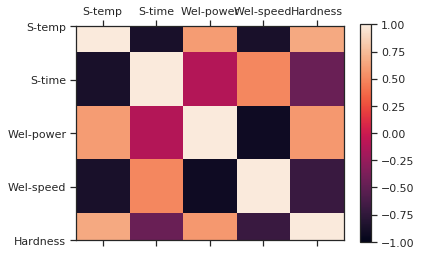

In [0]:
names=['S-temp','S-time','Wel-power','Wel-speed','Hardness']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**ANOVA ANALYSIS**

In [0]:
df.corr()

,S-temp,S-time,Wel-power,Wel-speed,Hardness
S-temp,1.000000,-0.866025,0.596040,-0.866025,0.660010
S-time,-0.866025,1.000000,-0.114708,0.500000,-0.453909
Wel-power,0.596040,-0.114708,1.000000,-0.917663,0.582370
Wel-speed,-0.866025,0.500000,-0.917663,1.000000,-0.689262
Hardness,0.660010,-0.453909,0.582370,-0.689262,1.000000


(0, 3.951261482832906)

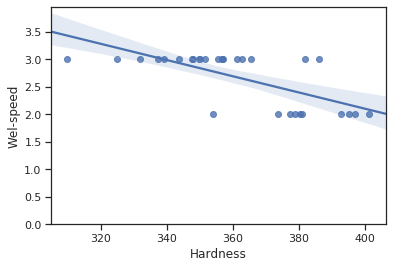

In [0]:
sns.regplot(x="Hardness", y="Wel-speed", data=df)
plt.ylim(0,)

In [0]:
df[["Hardness", "Wel-speed"]].corr()

,Hardness,Wel-speed
Hardness,1.000000,-0.689262
Wel-speed,-0.689262,1.000000


(0, 2145.617913196944)

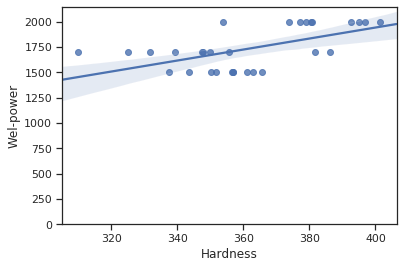

In [0]:
sns.regplot(x="Hardness", y="Wel-power", data=df)
plt.ylim(0,)

In [0]:
df[["Hardness", "Wel-power"]].corr()

,Hardness,Wel-power
Hardness,1.00000,0.58237
Wel-power,0.58237,1.00000


(0, 406.573753495217)

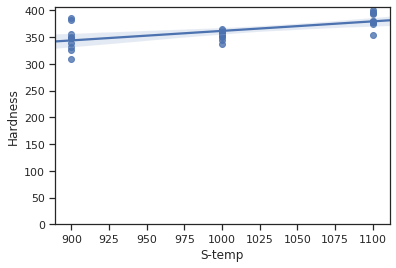

In [0]:
sns.regplot(x="S-temp", y="Hardness", data=df)
plt.ylim(0,)

In [0]:
df[["Hardness", "S-temp"]].corr()

,Hardness,S-temp
Hardness,1.00000,0.66001
S-temp,0.66001,1.00000


(0, 11.600306078704218)

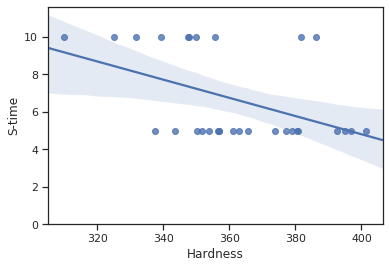

In [0]:
sns.regplot(x="Hardness", y="S-time", data=df)
plt.ylim(0,)

In [0]:

df[["Hardness", "S-time"]].corr()

,Hardness,S-time
Hardness,1.000000,-0.453909
S-time,-0.453909,1.000000


In [0]:
from scipy import stats

In [0]:
pearson_coef, p_value = stats.pearsonr(df['Hardness'], df['Wel-power'])
print("The pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The pearson Correlation Coefficient is 0.582369582276434 with a P-value of P = 0.0007342546355031784


In [0]:
pearson_coef, p_value = stats.pearsonr(df['Hardness'], df['S-temp'])
print("The pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The pearson Correlation Coefficient is 0.660010112755243 with a P-value of P = 7.241788087561906e-05


In [0]:
pearson_coef, p_value = stats.pearsonr(df['Hardness'], df['S-time'])
print("The pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The pearson Correlation Coefficient is -0.4539092981531073 with a P-value of P = 0.011752013550848341


In [0]:
pearson_coef, p_value = stats.pearsonr(df['Hardness'], df['Wel-speed'])
print("The pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The pearson Correlation Coefficient is -0.6892617506482372 with a P-value of P = 2.5268085725836663e-05


To see if different types 'Wel-power' impact 'Hardness"


**MODEL DEVELOPMENT**


In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
X = df[['Wel-power']]
Y = df['Hardness']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.3391543303608284

In [0]:
features =["S-temp", "S-time","Wel-power" ,"Wel-speed"]

In [0]:
X=df[['S-temp','S-time','Wel-power','Wel-speed']]
Y=df['Hardness']
lm.fit(X,Y)
lm.score(X,Y)

0.491004125834661